In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats, integrate
from sklearn import datasets, svm
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from mlwrap import get_test, get_train, push_test

In [3]:
x_train = pd.read_csv("data/x_train.csv", delimiter=";", dtype=np.float32)
y_train = pd.read_csv("data/y_train.csv", delimiter=";", header=None,
                      names=["returned"], dtype=np.float32)
train_data = pd.concat([x_train, y_train], axis=1)
test_data = pd.read_csv("x_test.csv", delimiter=";")

In [4]:
all_params = ["maxPlayerLevel",
              "numberOfAttemptedLevels",
              "attemptsOnTheHighestLevel",
              "totalNumOfAttempts",
              "averageNumOfTurnsPerCompletedLevel",
              "doReturnOnLowerLevels",
              "numberOfBoostersUsed",
              "fractionOfUsefullBoosters",
              "totalScore",
              "totalBonusScore",
              "totalStarsCount",
              "numberOfDaysActuallyPlayed",
]

In [5]:
train_data

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed,returned
0,39.0,10.0,3.0,17.0,24.444445,1.0,5.0,0.400000,2650000.0,1375.0,21.0,2.0,0.0
1,21.0,22.0,19.0,55.0,17.045454,1.0,6.0,0.333333,5614000.0,3825.0,51.0,4.0,1.0
2,5.0,6.0,1.0,6.0,8.400000,0.0,1.0,1.000000,857000.0,1150.0,14.0,1.0,1.0
3,21.0,2.0,5.0,6.0,19.000000,0.0,1.0,0.000000,120000.0,0.0,1.0,1.0,1.0
4,4.0,5.0,1.0,5.0,9.600000,0.0,1.0,1.000000,857000.0,1075.0,12.0,1.0,0.0
5,0.0,1.0,1.0,1.0,3.000000,0.0,0.0,0.000000,113000.0,250.0,0.0,1.0,0.0
6,13.0,14.0,2.0,19.0,15.500000,0.0,5.0,0.800000,3831000.0,2875.0,34.0,2.0,1.0
7,13.0,14.0,5.0,26.0,14.769231,0.0,4.0,0.500000,3458000.0,2375.0,31.0,2.0,1.0
8,2.0,3.0,1.0,3.0,7.666667,0.0,0.0,0.000000,420000.0,750.0,6.0,1.0,0.0
9,1.0,2.0,3.0,5.0,3.000000,1.0,0.0,0.000000,113000.0,250.0,3.0,1.0,0.0


In [12]:
ts = np.array(train_data)
for i, x in enumerate(ts):
    ts[i] = list(np.array(x) *
                      [1/100, 1/100, 1/100, 1/500, 1/40, 1, 1/100, 1, 1/30000000, 1/25000, 1/500, 1/10, 1.])
ts = pd.DataFrame(ts, columns=list(train_data.axes[1]))
list(train_data.axes[1])

['maxPlayerLevel',
 'numberOfAttemptedLevels',
 'attemptsOnTheHighestLevel',
 'totalNumOfAttempts',
 'averageNumOfTurnsPerCompletedLevel',
 'doReturnOnLowerLevels',
 'numberOfBoostersUsed',
 'fractionOfUsefullBoosters',
 'totalScore',
 'totalBonusScore',
 'totalStarsCount',
 'numberOfDaysActuallyPlayed',
 'returned']

In [13]:
#print(ts.describe())
train_data.corr()


,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed,returned
maxPlayerLevel,1.000000,0.616157,0.472142,0.757854,0.683706,0.368297,0.675955,0.126235,0.570234,0.551366,0.579593,0.793385,0.542139
numberOfAttemptedLevels,0.616157,1.000000,0.300797,0.836398,0.531197,0.290636,0.881915,0.332887,0.979954,0.989014,0.993779,0.663450,0.477400
attemptsOnTheHighestLevel,0.472142,0.300797,1.000000,0.532032,0.277072,0.197035,0.389465,-0.041700,0.277326,0.264804,0.281343,0.524109,0.302189
totalNumOfAttempts,0.757854,0.836398,0.532032,1.000000,0.509510,0.391969,0.836706,0.128843,0.798051,0.795570,0.808989,0.846448,0.520739
averageNumOfTurnsPerCompletedLevel,0.683706,0.531197,0.277072,0.509510,1.000000,0.250261,0.543847,0.457168,0.499681,0.489411,0.514770,0.555594,0.456771
doReturnOnLowerLevels,0.368297,0.290636,0.197035,0.391969,0.250261,1.000000,0.320439,0.071646,0.310218,0.271397,0.288803,0.383024,0.216669
numberOfBoostersUsed,0.675955,0.881915,0.389465,0.836706,0.543847,0.320439,1.000000,0.203519,0.854263,0.851824,0.862254,0.751712,0.493276
fractionOfUsefullBoosters,0.126235,0.332887,-0.041700,0.128843,0.457168,0.071646,0.203519,1.000000,0.328287,0.358474,0.358219,0.058929,0.103720
totalScore,0.570234,0.979954,0.277326,0.798051,0.499681,0.310218,0.854263,0.328287,1.000000,0.985111,0.986423,0.617847,0.451414
totalBonusScore,0.551366,0.989014,0.264804,0.795570,0.489411,0.271397,0.851824,0.358474,0.985111,1.000000,0.997357,0.606864,0.439642


In [30]:
scaler = StandardScaler()
scaler.fit(train_data)
train_data_scaled = pd.DataFrame(scaler.transform(train_data), columns=list(train_data.axes[1]))
#test_data_scaled = scaler.transform(test_data[all_params])

['maxPlayerLevel',
 'numberOfAttemptedLevels',
 'attemptsOnTheHighestLevel',
 'totalNumOfAttempts',
 'averageNumOfTurnsPerCompletedLevel',
 'doReturnOnLowerLevels',
 'numberOfBoostersUsed',
 'fractionOfUsefullBoosters',
 'totalScore',
 'totalBonusScore',
 'totalStarsCount',
 'numberOfDaysActuallyPlayed',
 'returned']

In [41]:
selector = SelectPercentile(f_classif)
selector.fit(np.array(train_data[all_params]), np.array(train_data["returned"]))
print(selector.pvalues_)
#scores = -np.log10(selector.pvalues_)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


([<matplotlib.axis.XTick at 0x7f35142b19b0>,
 <a list of 12 Text xticklabel objects>)

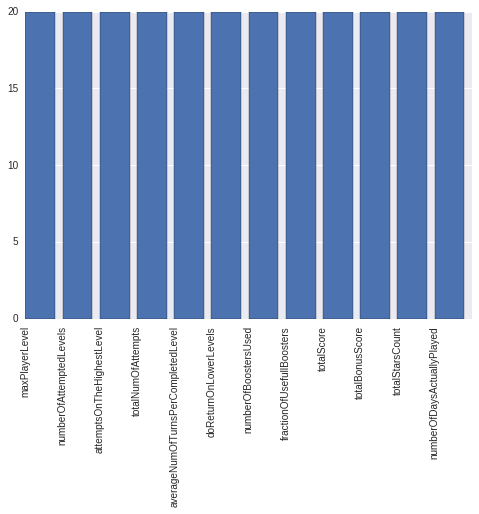

In [35]:
plt.bar(range(len(all_params)), scores)
plt.xticks(range(len(all_params)), all_params, rotation='vertical')
#plt.show()

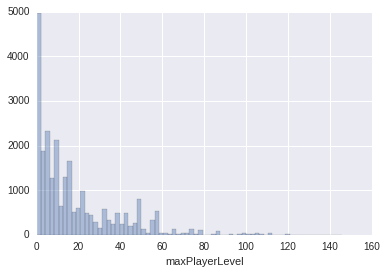

In [53]:
sns.distplot(train_data["maxPlayerLevel"], kde=False, bins=70);

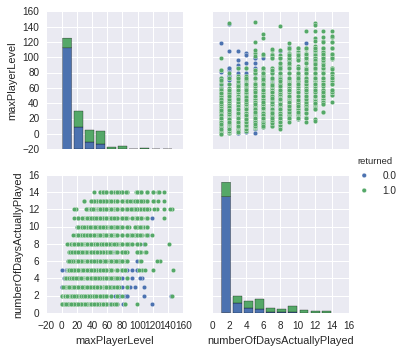

In [55]:
sns.pairplot(train_data, vars=["maxPlayerLevel", "numberOfDaysActuallyPlayed"], hue="returned", dropna=True)

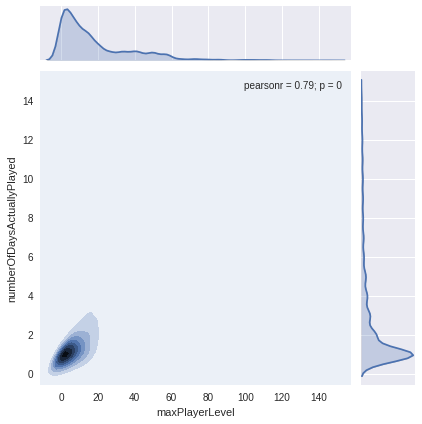

In [58]:
sns.jointplot(x="maxPlayerLevel", 
              y="numberOfDaysActuallyPlayed", 
              data=train_data[["maxPlayerLevel", "numberOfDaysActuallyPlayed", "returned"]], 
              kind="kde",
              hue="returned");

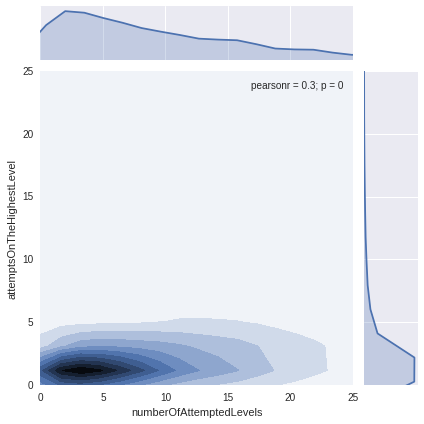

In [66]:
sns.jointplot(x="numberOfAttemptedLevels", 
              y="attemptsOnTheHighestLevel", 
              data=train_data[["numberOfAttemptedLevels", "attemptsOnTheHighestLevel", "returned"]], 
              kind="kde",
              #hue="returned",
              xlim=(0, 25), ylim=(0, 25))

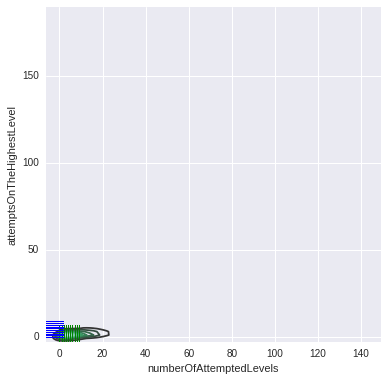

In [61]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(train_data["numberOfAttemptedLevels"], train_data["attemptsOnTheHighestLevel"], ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

In [67]:
train_data.describe()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed,returned
count,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.0,25289.000000,25289.000000,25289.000000,25289.000000
mean,18.424889,12.415991,3.507612,26.841394,13.330450,0.152438,4.901222,0.534841,2884268.5,2138.215088,26.884495,2.725058,0.288189
std,20.172964,12.991894,6.766648,39.993031,6.657224,0.359452,6.630468,0.402091,3415374.5,2169.987061,29.403566,2.765349,0.452928
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
25%,4.000000,3.000000,1.000000,4.000000,8.400000,0.000000,0.000000,0.000000,483000.0,575.000000,6.000000,1.000000,0.000000
50%,11.000000,8.000000,1.000000,12.000000,14.555555,0.000000,2.000000,0.619048,1700000.0,1500.000000,18.000000,1.000000,0.000000
75%,27.000000,16.000000,3.000000,31.000000,17.719999,0.000000,6.000000,1.000000,3890000.0,2875.000000,37.000000,3.000000,1.000000
max,146.000000,142.000000,186.000000,563.000000,40.000000,1.000000,81.000000,1.000000,31338000.0,24275.000000,319.000000,14.000000,1.000000


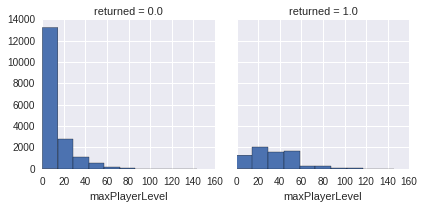

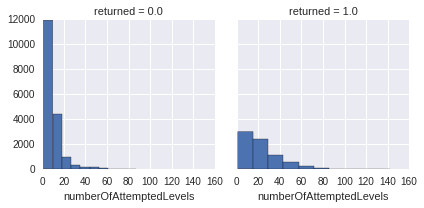

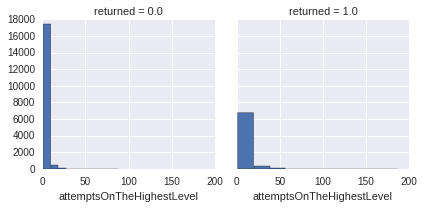

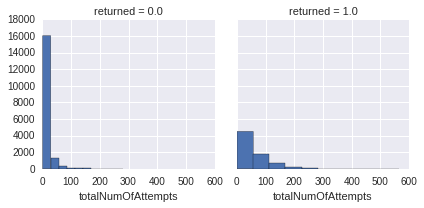

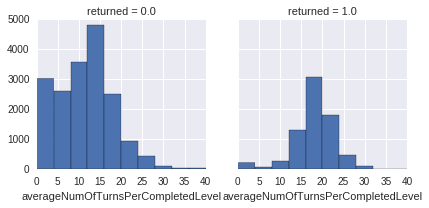

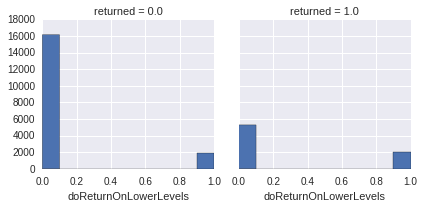

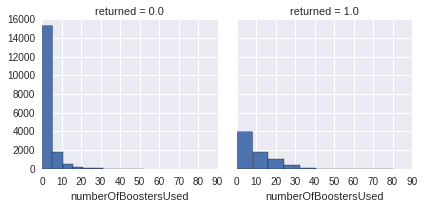

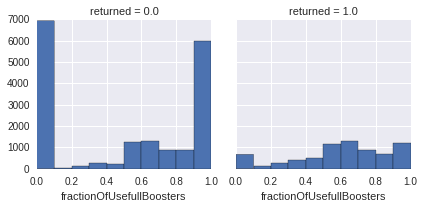

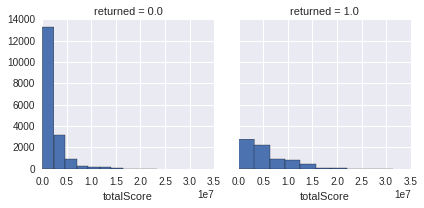

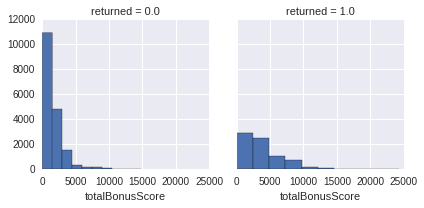

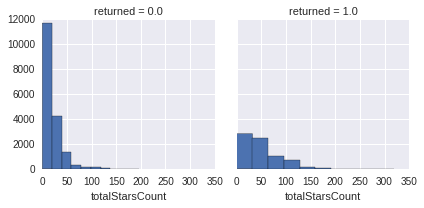

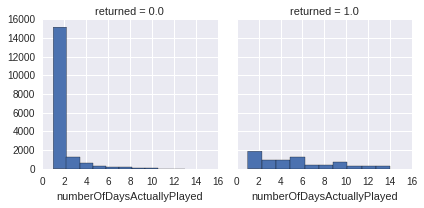

In [80]:
for param in all_params:
    sns.FacetGrid(train_data, col="returned").map(plt.hist, param);


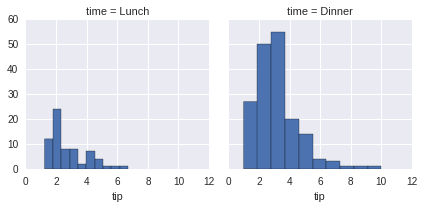

In [71]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");